# 정보이론에 대하여

이번 시간에는 머신러닝이론의 이론적 토대를 이루는 가장 중요한 이론 중 하나인 정보이론(Information Theory)에 대해 알아보고, 머신러닝에서 많이 사용되는 Entropy, Cross Entropy, KL divergence 등의 개념에 대해서 파악해보도록 하겠습니다.

**context**

1. [Information Content](#information-content)
2. [Etropy](#entropy)
3. [Kullback Leibler Divergence](#kullback-leibler-divergence)
4. [Cross Entropy Loss](#cross-entropy-loss)
5. [Decision Tree와 Entropy](#decision-tree와-entropy)


## Information Content

**정보 이론**(information theory)란, 추상적인 '정보'라는 개념을 정량화하고 정보의 저장과 통신을 연구하는 분야입니다.

### Information Content

'정보'는 눈에 보이지 않는데 이것을 어떻게 정량적으로 표현할 수 있을까요?  아래 그림처럼 두개의 주머니에 공이 들어있다고 생각해봅시다. 왼쪽 주머니에는 4가지 색의 공들이 들어있고, 오른쪽 주머니에 있는 공은 모두 파란색입니다.

![img](https://aiffelstaticprd.blob.core.windows.net/media/images/math08_1-1.max-800x600.png)

왼쪽 주머니에서 공을 하나 꺼내 색을 보고 다시 넣는 과정을 반복하면, 관찰된 공의 색깔은 4가지 중 무작위입니다. 반면 오른쪽 주머니에서 공을 꺼낸다면 파란색 공만 관찰될 것입니다. 직관적으로, 주머니에서 공을 꺼낼 때 우리가 얻을 수 있는 정보의 양은 왼쪽이 더 많습니다. 오른쪽 주머니에서는 공을 꺼내봤자 어차피 파란색이니 별 다른 정보가 없는 것이죠. 오늘 아침에 해가 동쪽에서 떴다는 이야기가 뉴스거리가 되지 못하는 것과 같은 이유입니다.

상황을 약간 바꿔서, 파란색 공 999개와 빨간색 공 1개가 들어있는 주머니가 있다고 합시다. 어떤 사람이 공을 하나 꺼내고 다시 넣는 실험을 반복합니다. 이 사람은 주머니에 어떤 색깔의 공이 몇 개씩 들어있는지 모르기 때문에 공을 하나씩 뽑을 때마다 이 사람이 추측하는 확률 분포가 업데이트 됩니다. 파란색 공을 처음 몇번 뽑았을 때, 파란색 공을 뽑는 사건은 정보량이 높습니다. 하지만 파란색 공만 수십, 수백번을 뽑고 나서는 파란색 공을 뽑는 사건은 확률이 1에 가깝기 때문에 큰 의미를 주지 못합니다. 그러다가 만약에 하나 있는 빨간색 공을 뽑는다면, 이 사건은 정보량이 엄청나게 높을 것입니다. 빨간색 공을 뽑기 전까지 관찰된 파란색 공의 수가 많을 수록 빨간색 공을 뽑는 사건은 정보량이 높아집니다.

Goodfellow, Bengio, Courville의 책 [Deep Learning](http://www.deeplearningbook.org/)에는 정보를 정량적으로 표현하기 위해 필요한 세가지 조건이 설명되어 있습니다.

1. 일어날 가능성이 높은 사건은 정보량이 낮고, 반드시 일어나는 사건에는 정보가 없는 것이나 마찬가지입니다.
2. 일어날 가능성이 낮은 사건은 정보량이 높습니다.
3. 두 개의 독립적인 사건이 있을 때, 전체 정보량은 각각의 정보량을 더한 것과 같습니다.

사건 $x$가 일어날 확률을 $P(X=x)$라고 할 때, **정보량 (Information Content)** $I(x)$는 아래와 같이 정의됩니다.

$$I(x)=- \log_b P(x)$$

위의 세가지 조건을 모두 만족하는 것을 확인할 수 있습니다. 로그의 밑 $b$에는 주로 2, $e$, 10과 같은 값이 사용되는데, $b=2$의 경우 정보량은 정보를 나타내기 위해 필요한 비트(bit)의 개수와 같습니다. 여기에서는 밑이 $e$인 자연로그를 사용하겠습니다. 아래의 그림은 $P(x)$의 값에 대한 $-\log P(x)$의 그래프입니다.

![img](https://aiffelstaticprd.blob.core.windows.net/media/images/math08_1-2.max-800x600.png)

파란색 공 n개와 빨간색 공 1개가 있을 때 빨간색 공을 뽑는 사건의 정보량을 코드로 계산해보겠습니다. 빨간색 공이 뽑힐 때까지 공을 꺼내는 시뮬레이션이 반복됩니다. 전체 공의 개수가 많을수록 1개 있는 빨간색 공이 뽑힐 확률은 작아지고 평균적으로 계산되는 정보량이 커집니다.

In [11]:
import numpy as np
import math
import random

# 주머니 속에 들어있는 공의 갯수입니다. 숫자를 바꿔가며 실험해보세요!
total = 1000

# ---- #

count = 1 # 실험이 끝날 때까지 꺼낸 공의 개수

# 1부터 total 정수 중에서 하나를 뽑고 total과 같으면 실험 종료
# total = 1000인 경우 1 ~ 999 : blue / 1000 : red

while True:
    sample = random.randrange(1, total+1)
    if sample == total:
        break
    count += 1

print('number of blue samples : ' + str(count-1))
print('information content : '+ str(-math.log(1/count)))

number of blue samples : 574
information content : 6.354370040797351


## Entropy

이전 스텝을 돌이켜보면, 사건 $x$의 정보량 $I(x)$는 사건이 일어날 확률 $P(x)$에 의해 결정되었습니다.

$$I(x)=-\log P(x)$$

정보량은 한가지 사건에 대한 값입니다. 예를 들면 주사위를 던졌을 때 1이 나오는 사건, 여러 색깔의 공이 들어있는 주머니에서 빨간색 공을 꺼내는 사건 등입니다. 그러면 *여러가지 경우의 수가 존재*하는 실험의 정보량도 구할 수 있을까요?

직관적으로, 확률 변수가 가지는 모든 경우의 수에 대해 정보량을 구하고 평균을 내면 확률 변수의 평균적인 정보량을 구할 수 있을 것입니다. 특정 확률분포를 따르는 사건들의 정보량 기댓값을 **엔트로피(Entropy)**라고 합니다.

### For Discrete Random Variables

이산 확률 변수 $X$가 $x_1, x_2, ..., x_n$ 중 하나의 값을 가진다고 생각합시다. 엔트로피는 각각의 경우의 수가 가지는 정보량에 확률을 곱하고 모두 더한 값입니다.

$$H(X)=\mathbb{E}_{X \sim P}[I(x)]=-\sum_{i=1}^{n} p_i \log p_i \quad (p_i:=P(X=x_i))$$

![img](https://aiffelstaticprd.blob.core.windows.net/media/images/math08_2-1.max-800x600.png)

위 그림은 여러개의 공이 들어있는 주머니에서 공을 꺼낼 때 각각의 엔트로피 값을 계산한 예제입니다. 위쪽 주머니에는 4가지 색깔의 공이 들어있고, 특정한 색깔의 공이 뽑힐 확률이 각각 0.4, 0.3, 0.2, 0.1이므로 엔트로피는 약 1.28입니다. 반면 아래쪽 주머니에는 파란색 공만 들어있는데, 파란색 공이 뽑힐 확률이 1이므로 엔트로피는 $ -1 \log 1 = 0 $이 됩니다. 여러가지 색깔의 공이 들어있을 때 엔트로피가 높고, 같은 색깔의 공이 많이 들어있을 때 엔트로피가 낮슶니다. 주머니에 공이 10개가 있을 때, 10개가 모두 다른 색깔인 경우 엔트로피는 $-(0.1 \log 0.1) \times 10 \approx 2.3$으로 최댓값을 가지고, 모두 같은 색깔인 경우 엔트로피는 0으로 최솟값을 가집니다. 이러한 사실은 엔트로피의 직관적인 개념인 *무질서도, 불확실성*과도 비슷합니다.

![img](https://aiffelstaticprd.blob.core.windows.net/media/images/math08_2-2.max-800x600.png)

공의 색깔이 2가지가 있는 경우를 한번 살펴보면 확률변수가 가질 수 있는 사건들이의 확률이 균등할수록 엔트로피 값은 증가합니다.

아래 그림은 동저거을 던질 때 앞면이 나올 확률에 따른 엔트로피를 나타낸 그래프입니다. 앞면이 나올 확률이 0.5일 때(앞면과 뒷면의 확률이 각각 0.5로 같은 **균등 분포**(uniform distribution)) 엔트로피 값이 최대가 됩니다. 앞면이 나올 확률이 90%인 동전을 던질 때 보다 앞면과 뒷면의 확률이 같은 동전을 던질 때 결과를 예측하기가 더 여렵기 때문에 불확실성이 크다고 할 수 있습니다. 

![img](https://aiffelstaticprd.blob.core.windows.net/media/images/math08_2-3.max-800x600.png)


### For Continuous Random Variables

$X$가 이산 확률 변수일 때 엔트로피는 위와 같이 정보량에 확률을 각각 곱해서 모두 더한 값으로 정의됩니다. $X$가 연속적인 값을 갖는 연속 확률 변수일 때는 유한합 대신 적분의 형태로 정의됩니다. 확률변수 $X$의 확률밀도 함수가 $p(x)$일 때 엔트로피는 다음과 같습니다.

$$h(X)=-\int p(x) \log p(x)dx$$

연속 확률 변수의 엔트로피를 이산 확률 변수와 구분하여 **미분 엔트로피**(diffrential entropy)라고 부르기도 합니다.

## Kullback Leibler Divergence

머신러닝의 목표는 새로운 입력 데이터가 들어와도 예측이 잘 되도록 모델이 나타내는 확률 분포를 데이터의 실제 확률 분포에 가깝게 만드는 것입니다. 머신런링 모델은 크게 두가지가 있는데, 결정 모델(discriminative model)은 데이터의 실제 분포를 모델링하지 않고 결정 경계(decision boundary)만을 학습합니다. 예를들면 모델의 결과 값이 0보다 작을 경우 데이터를 1번 클래스로 분류하고, 0보다 클 경우 2번 클래스로 분류하는 식입니다. 반면에 생성 모델(generative model)은 데이터와 모델로부터 도출할 수 있는 여러 확률 분포와 베이즈 이론을 이용해서 데이터의 실제 분포를 간접적으로 모델링합니다. 그렇기 때문에 생성 모델을 학습시킬 때는 두 확률 분포의 차이를 나타내는 지표가 필요한데, 대표적인 예가 **콜백-라이블러 발산**(Kullback-Leibler divergence, KL divergence)입니다.

데이터가 따르는 실제 확률 분포를 $P(x)$, 모델이 나타내는 확률 분포를 $Q(x)$라고 합시다. 두 확률 분포의 KL divergence는 $P(x)$를 기준으로 계산된 $Q(x)$의 평균 정보량과, $P(x)$를 기준으로 계산된 $P(x)$의 평균 정보량의 차이로 정의되는데, 실제 확률 분포 $P(x)$ 대신 근사적인 분포 $Q(x)$를 사용했을 때 발생하는 엔트로피의 변화량을 나타내는 값입니다.

$$D_{KL}(P||Q)=\mathbb{E}_{X\sim P}[-\log Q(x)]-\mathbb{E}_{X\sim P}[-\log P(x)]=\sum P(x)\log \left(\frac{P(x)}{Q(x)}\right)$$


연속 확률 변수의 경우에는 다음과 같습니다.

$$D_{KL}(P||Q)=\int P(x)\log \left(\frac{P(x)}{Q(x)}\right)$$

KL divergence는 두 확률 분포의 차이를 나타내는 값이기 때문에 거리 함수와 비슷한 성질을 가지고 있습니다. 다만 KL divergence의 식에는 기준이 되는 확률 분포가 존재하기 때문에 $D_{KL}(P||Q)$와 $D_{KL}(Q||P)$의 값은 같지 않습니다.

1. $D_{KL}(P||Q) \ge 0$
2. $D_{KL}(P||Q)=0$ if and only if $P=Q$
3. non-symmetric : $D_{KL}(P||Q) \neq D_{KL}(Q||P)$

머신러닝 문제에서는 두 확률 분포의 차이를 줄여야 하므로 $D_{KL}(P||Q)$를 최소화하는 방향으로 모델을 학습시킵니다.

![img](https://aiffelstaticprd.blob.core.windows.net/media/images/math08_3-1.max-800x600.png)

$P(x)$는 데이터의 실제 분포이므로, 우리가 바꿀 수 없는 고정된 값입니다. 위의 식에서 오른쪽의 파란색 부분은 모델을 아무리 잘 만들어도 값을 줄일 수 없습니다. 우리가 바꿀 수 있는 부분은 $Q(x)$에 관한 식이기 때문에 KL divergence를 최소화하는 문제는 곧 빨간색 부분을 최소화하는 문제가 됩니다. 이 부분은 $P(x)$를 기준으로 계산한 $Q(x)$의 엔트로피, 즉 $P(x)$에 대한 $Q(x)$의 **교차 엔트로피(cross entropy)**입니다.

### Cross Entropy

$P(x)$에 대한 $Q(x)$의 교차 엔트로피 식을 다시 적으면 다음과 같습니다.

$$H(P,Q)=-\mathbb{E}_{X\sim P}[\log Q(x)]=-\sum P(x)\log Q(x)$$

KL divergence의 계산식으로부터 엔트로피와 교차 엔트로피, KL divergence 사이의 관계식을 얻을 수 있습니다.

![img](https://aiffelstaticprd.blob.core.windows.net/media/images/math08_3-2.max-800x600.png)

$$H(P,Q)=H(P)+D_{KL}(P||Q)$$

이렇게 해서 우리는 정답셋의 확률분포 P와 우리 모델의 추론 결과의 확률분포 Q의 차이 KL divergence를 최소화하는 것, 즉 우리 모델의 추론 결과가 정답셋에 최대한 유사하게 하는 것과 교차 엔트로피를 최소화 하는 것이 수학적으로 같다는 것을 확인했습니다. 


## Cross Entropy Loss

머신러닝에서 모델이 나타내는 확률 분포와 데이터가 따르는 실제 확률 분포 사이의 차이를 나타내는 함수를 **손실 함수**(loss function)이라고 합니다. 모델의 확률 분포는 파라미터에 따라 달라지기 때문에 손실 함수 역시 파라미터에 의해 결정됩니다. 

데이터가 연속적인 값을 가지는 회귀(regression) 문제와는 다르게, 이산적인 값을 가지는 분류(classification)문제에서는 모델의 출력 결과 로지스틱 함수 (logistric function)로 표현됩니다. 분류 클래스가 2개의 로지스틱 함수를 클래스가 $n$개일 때로 확장한 것이 딥러닝에서도 자주 사용되는 소프트맥스 함수 (softmax function)입니다. 이 함수와 데이터의 확률 분포의 차이가 분류 문제의 손실 함수가 됩니다.

앞에서 KL divergence를 최소화하는 것이 cross entropy를 최소화하는 것과 같다는 이야기를 했습니다. cross entropy 또한 손실함수의 한 종류입니다. cross entropy의 다시 살펴봅시다.

$$H(P,Q)=-\mathbb{E}_{X\sim P}[\log Q(x)]=-\sum P(x)\log Q(x)$$

분류 문제에서 데이터의 라벨 one-hot encoding을 통해 표현됩니다. 클래스의 종류가 $N$가지이고 특정 데이터가 $n$번째 클래스에 속할 때, $n$번째 원소만 1이고 나머지는 0으로 채운 $N$차원 벡터로 놓는 것이죠. 입력 데이터의 특성(feature) 값이 모델을 통과하면 출력 레이어의 소프트맥스 함수에 의해서 각각의 클래스에 속할 확률이 계산됩니다. 이 확률 값들이 모델이 추정한 확률 분포 $Q(x)$를 구성하는 값들입니다. 3개의 클래스 $c_1,c_2,c_3$가 존재하는 분류 문제에서 어떤 데이터의 출력값이 다음과 같다고 가정합시다.

$$\mathrm{softmax(input)} = \begin{bmatrix}
0.2 \\ 0.7 \\ 0.1
\end{bmatrix}$$

이 결과는 곧 다음 식을 나타냅니다.

$$Q(X=c_1)=0.2$$

$$Q(X=c_2)=0.7$$

$$Q(X=c_3)=0.1$$


데이터가 실제로 2번 클래스에 속할 경우, 데이터의 실제 확률 분포는 one-hot encoding과 같은 $[0, 1, 0]$입니다. 데이터가 2번 클래스에 포함된다는 사실이 이미 확실하게 알려졌기 때문에 확률 분포가 이와 같이 계산되는 것입니다.

$$P(X=c_1)=0$$

$$P(X=c_2)=0$$

$$P(X=c_3)=0$$

cross entropy를 사용하면 $P(x)$와 $Q(x)$의 차이를 다음과 같이 계산할 수 있습니다.

$$\begin{split}
H(P,Q) &= -\sum P(x)\log Q(x) \\
&= -\left(0\cdot\log 0.2+1\cdot\log 0.7+0\cdot\log 0.1\right) \\
&= -\log 0.7 \approx 0.357
\end{split}$$

분류 문제에서는 데이터의 확률 분포가 위와 같이 one-hot vector로 표현되기 때문에, $P(x)$와 $Q(x)$의 차이를 cross entropy로 계산할 경우 계산이 간단해진다는 장점이 있습니다. 아래는 $P(x)$ 분포가 랜덤하게 생성되었을 때 $Q(x)$를 변형시키면서 cross entropy를 계산해볼 수 있는 코드입니다.

In [14]:
import numpy as np
import random

# generate random output
# ----------------- #
# can be modified
class_num = 4
# ----------------- #
q_vector = []
total = 1

for i in range(class_num - 1):
    q = random.uniform(0, total)
    q_vector.append(round(q, 3))
    total = total - q

q_vector.append(total)
softmax_output = np.array(q_vector)

print(softmax_output)

[0.259      0.674      0.058      0.00947757]


In [15]:
# ------------------- #
# can be modified
class_index = 1
# ------------------- #

p_vector = np.zeros(class_num)
p_vector[class_index - 1] = 1

cross_entropy = -np.sum(np.multiply(p_vector, np.log(softmax_output)))

print("model prediction : " + str(softmax_output))
print("data label : " + str(p_vector))
print("cross entropy : "+ str(round(cross_entropy, 4)))

model prediction : [0.259      0.674      0.058      0.00947757]
data label : [1. 0. 0. 0.]
cross entropy : 1.3509


### Cross Entropy 와 Likelihood의 관계

모델의 파라미터를 $\theta$로 놓으면, 모델이 표현하는 확률 분포는 $Q(\mathbf{y}|X,\theta)$ 로, 데이터의 실제 분포는 $P(\mathbf{y}|X)$ 로 나타낼 수 있습니다. 그런데 $Q(\mathbf{y}|X,\theta)$는 데이터셋과 파라미터가 주어졌을 때 예측값의 분포를 나타내므로 모델의 likelihood와 같습니다.

$$\begin{split}
H(P,Q) &= -\sum P(\mathbf{y}|X)\log Q(\mathbf{y}|X,\theta) \\
&= \sum P(\mathbf{y}|X)\left(-\log Q(\mathbf{y}|X,\theta)\right)
\end{split}$$

$X$와 $y$는 데이터셋에 의해 결정되는 값이기 때문에 모델의 식이 바뀌어도 변하지 않습니다. 우리가 바꿀 수 있는 부분은 $-\log Q(\mathbf{y}|X,\theta)$ 뿐이죠. 그러므로 cross entropy를 최소화하는 파라미터 값을 구하는 것은 negative log likelihood를 최소화 하는 파라미터를 구하는 것과 결국 같다고 할 수 있습니다.

## Decision Tree와 Entropy

딥러닝의 분류 모델 학습의 기초를 이루는 Cross Entropy 개념에 대해 지금까지 살펴보았습니다. 그 외에도 엔트로피 개념이 활발하게 쓰이는 분야를 하나만 더 짚어보자면 의사결정나무(Decision Tree) 계열의 모델일 것입니다.

의사결정나무를 설명하는 가장 간단한 데이터셋을 기준으로 잠시 의사결정나무의 원리를 설명하겠습니다. 아래 그림은 날씨에 따른 운동 경기 여부를 기록한 데이터입니다. Day를 제외하고, 다음과 같은 4개의 데이터 칼럼이 있으며, Play(Yes/No) 칼럼이 라벨 역할을 하게 됩니다.

- Outlook : 전반적 날씨 (Sunny(맑은), Overcast(구름낀), Rainy(비오는))
- Temperature : 기온 정보 (섭씨 온도)
- Humidity : 습도 정보 - 수치형 변수(%), 범주형으로 변환된 경우 (high, normal)
- Windy : 풍량 정보 (True(바람 붐), False(바람 안붐))

![Img](https://aiffelstaticprd.blob.core.windows.net/media/original_images/F-36-DT.png)

의사 결정 트리는, 가지고 있는 데이터에서 어떤 기준으로 전체 데이터를 나눴을 때 나누기 전보다 엔트로피가 감소하는지를 따져서 엔트로피가 감소하면 그만큼 모델 내부에 정보 이득(information Gain)을 얻었다고 보는 관점입니다. 엔트로피 증가가 정보 손실량이라고 정의하는 것의 반대 관점이죠.

$$IG(S, F) = e(S) - \sum_{f \in F} \dfrac{|S_f|}{|S|} e(S_f)$$

- $S$ : 전체 사건의 집합
- $F$ : 분류 기준으로 고려되는 속성(feature)의 집합
- $f \in F$ : $f$는 $F$에 속하는 속성 (예를들어 $F$가 outlook일 때, $f$는 Sunny, Overcast, Rainy) 중 하나가 될 수 있다.)
- $S_f$ : $f$ 속성을 가진 $S$의 부분집합
- $|X|$ : 집합 $X$의 크기 (원소의 갯수)
- $e(X)$ : $X$라는 사건 집합이 지닌 엔트로피

위 수식 $IG(S, F)$란 다름 아니라, $F$라는 분류 기준을 선택했을 때의 엔트로피를 전체 사건의 엔트로피에 빼준 값, 분류 기준 채택을 통해 얻은 정보 이득의 양을 말합니다.

먼저 $e(S)$부터 구해봅시다. 전체 14가지의 경우 중 play하는 경우가 9번, 하지 않은 경우가 5번입니다. 그렇다면 $e(S)$는 다음과 같습니다.

$$e(S) = -(\dfrac{9}{14} \log_2 \frac{9}{14} + \dfrac{5}{14} \log_2 \frac{5}{14} ) = 0.94$$

그러 $F$가 outlook일 때, 즉 $f$는 Sunny, Overcast, Rainy 중 하나일 때의 엔트로피를 각각 구해봅시다.

$$\begin{aligned}  
e(S_{\text{Sunny}}) &= -( \dfrac{2}{5} \log_2 \dfrac{2}{5} + \dfrac{3}{5} \log_2 \dfrac{3}{5}) = 0.97 \\  
e(S_{\text{Overcast}}) & = 0 \\  
e((S_{\text{Rain}}) & =  -( \dfrac{3}{5} \log_2 \dfrac{3}{5} + \dfrac{2}{5} \log_2 \dfrac{2}{5}) = 0.97 
\end{aligned}$$

그러므로 이때의 정보이득은 다음과 같습니다.

$$\sum_{f \in F} \dfrac{|S_f|}{|S|} e(S_f) = \dfrac{5}{14}e(S_{\text{Sunny}}) + \dfrac{4}{14}e(S_{\text{Overcast}}) + \dfrac{5}{14}e(S_{\text{Rain}}) = \dfrac{5}{14}0.97 + \dfrac{4}{14}0 + \dfrac{5}{14}0.97 = 0.69$$

$$IG(S, F) = e(S) - \sum_{f \in F} \dfrac{|S_f|}{|S|} e(S_f) = 0.94 - 0.69 = 0.25$$

이런 방식으로 가능한 모든 분류 기준 $F$에 대해 정보이득을 계산해서, 가장 정보이득이 큰 순서대로 전체 사건을 2등분 합니다. 그 후 다시 다른 분류기준으로 위에서 했던 것과 동일하게, 이번에는 첫번째로 사용했던 기준으로 나뉜 절반의 사건 집합 안에서 정보이득을 계산하는 방식으로 세부 분류 기준을 계속 찾아나갑니다. 그렇게 사건 분류 기준을 세워나가다보면 전체 사건 분류 기준이 트리 구조가 되기 때문에 이를 의사결정나무(Decision Tree)라 부르게 됩니다.

그럼 엔트로피가 낮은 쪽으로 간다면 무조건 정교한 분류가 가능할까요? 한번 의사결정나무 모델을 학습시켜보고, 이를 시각화하는 과정을 통해 살펴보겠습니다.

위에서 예로 든 데이터셋은 실험하기에는 너무 작은 데이터셋이므로 다른 데이터셋을 준비해보겠습니다. 아래는 캐글에서 제공하는 [Pima Indians Diabetes Database](https://www.kaggle.com/uciml/pima-indians-diabetes-database) 입니다.

터미널에서 아래 명령어를 입력해 다운로드받아주세요.


```bash
$ wget https://aiffelstaticprd.blob.core.windows.net/media/documents/diabetes.csv
$ mv diabetes.csv ./data/
```

그리고 실험을 위해 추가로 다음과 같은 설치 작업을 진행해줍니다.

```bash
$ sudo apt-get install graphviz
$ pip install graphviz
$ pip install pydotplus
```

In [16]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [17]:
import os
csv_path = os.path.dirname(os.path.abspath('__file__')) + r'/data/diabetes.csv'

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

df = pd.read_csv(csv_path, header = 0, names = col_names)
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
# 데이서셋 준비
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
y = df.label
X = df[feature_cols]

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3,
    random_state = 1
)

In [19]:
# Decision Tree 모델 학습 
clf = DecisionTreeClassifier()

# Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy : ", metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.670995670995671


Decision Tree를 아무 제약조건 없이 학습시켜 나온 결과 정확도는 67%정도 됩니다.

Decision Tree의 장점은 어떻게 모델이 이런 결과를 내었는지 분류기준을 따져보고 사각화를 통한 원인 추적이 가능하다는 점입니다. 다음과 같이 방금 학습시킨 Decision Tree 모델을 시각화해 보겠습니다.

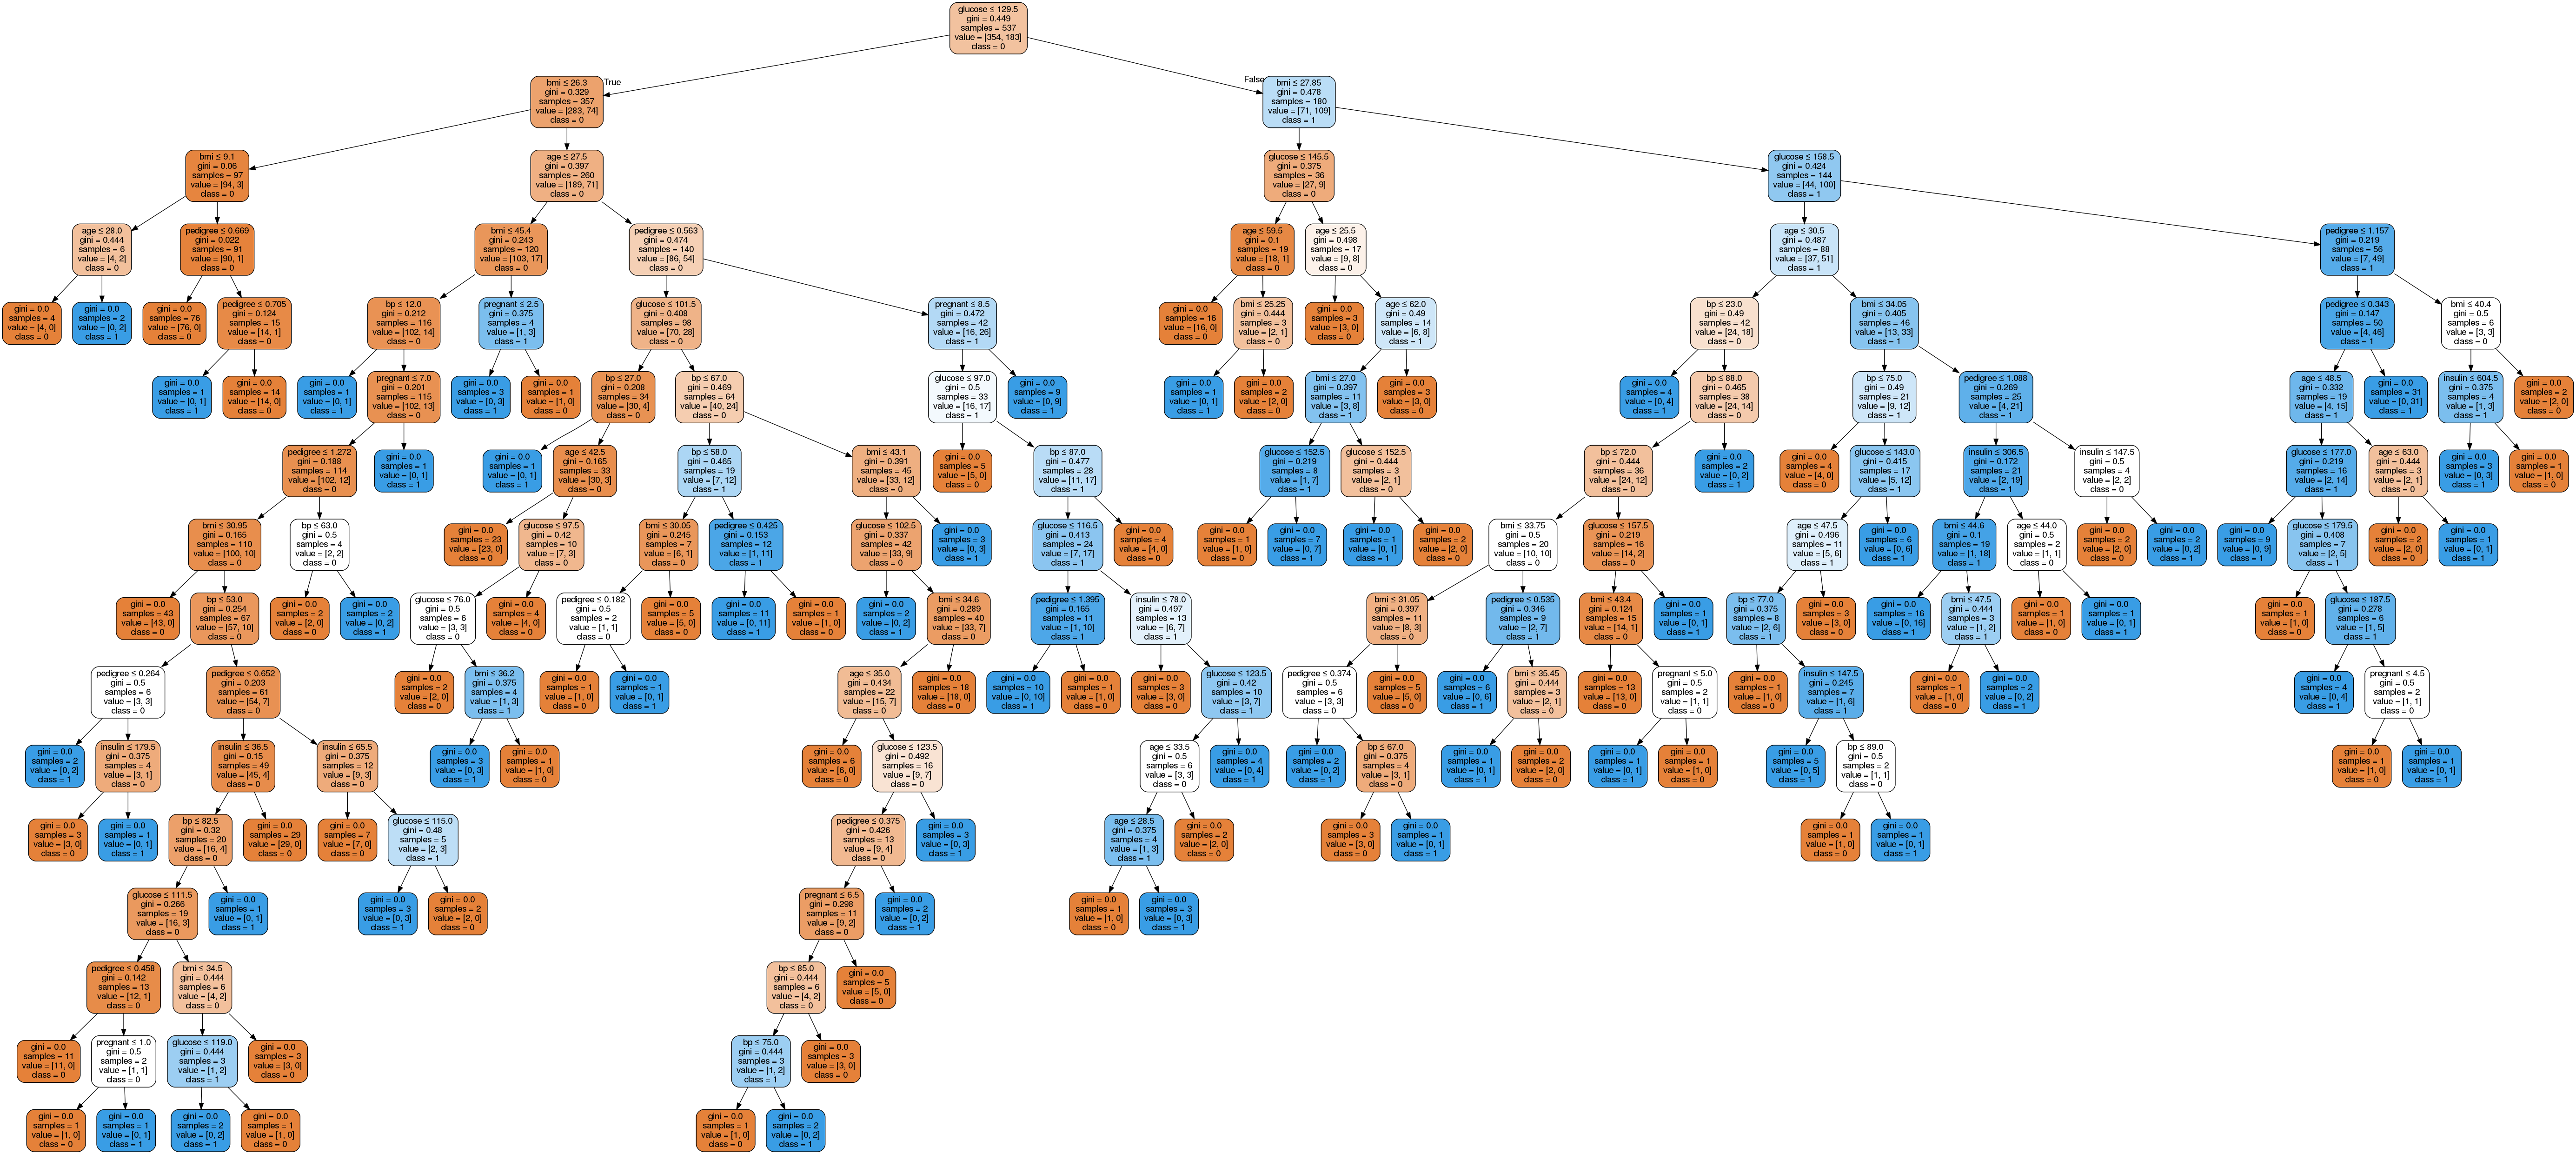

In [20]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file = dot_data,
               filled = True, rounded = True,
               special_characters = True,
               feature_names = feature_cols,
               class_names = ['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [21]:
# 정보이득이 되지 않고 남은 Impurity 총량 측정
ccp_path1 = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_path2 = clf.cost_complexity_pruning_path(X_test, y_test)
print(np.mean(ccp_path1.impurities))
print(np.mean(ccp_path2.impurities))

0.1550418448388093
0.14867712053802257


시각화해 본 결과, 우리가 학습시킨 Decision Tree는 정보이득을 최대화 할 수 있는 지점까지 극한적으로 많은 분류 기준을 적용한 경우임을 알 수 있었습니다. 그런데 이것이 과연 타당할까요?

비교 실험을 해보겠습니다. 우리는 Decision Tree를 3 depth까지만 발전시켜보겠습니다.

In [22]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)

# Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print('Accuracy : ', metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.7705627705627706


오히려 Accuracy가 훨씬 올라갔습니다. 이때의 트리구조 및 정보이득이 되지 않은 남은 엔트로피(Impurity) 총량은 어떨까요?

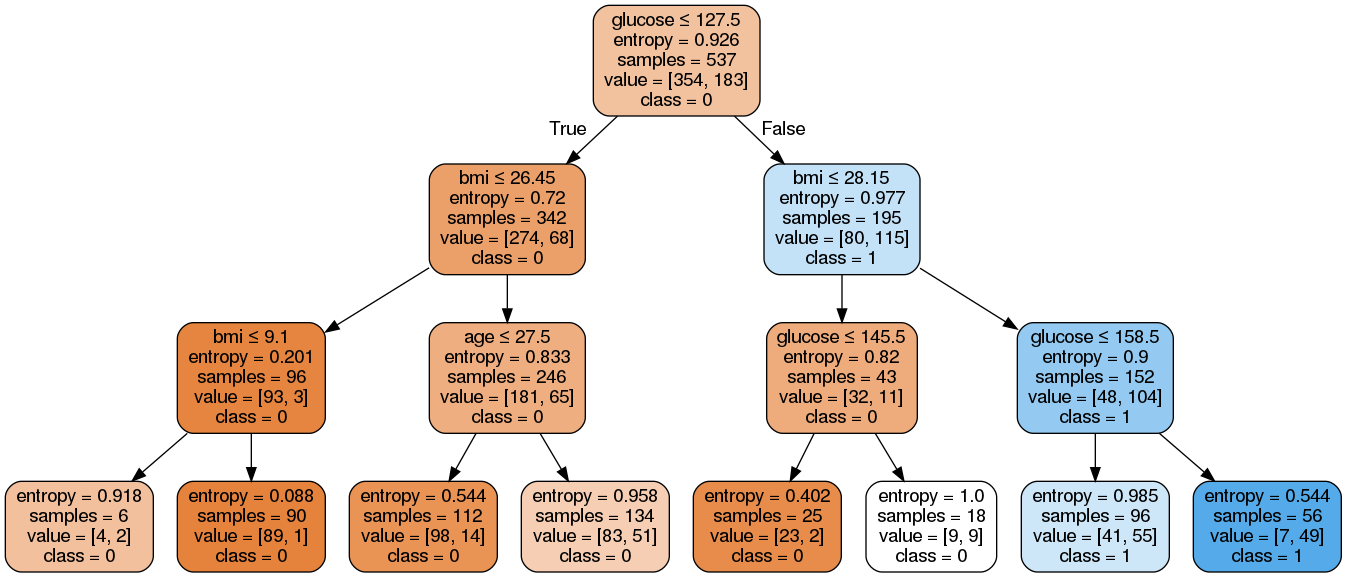

In [25]:
dot_data = StringIO()
export_graphviz(clf, out_file = dot_data,
               filled = True, rounded = True,
               special_characters = True,
               feature_names = feature_cols,
               class_names = ['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [26]:
# 정보이득이 되지 않고 남은 Impurity 총량 측정
ccp_path1 = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_path2 = clf.cost_complexity_pruning_path(X_test, y_test)
print(np.mean(ccp_path1.impurities))
print(np.mean(ccp_path2.impurities))

0.7474881472739515
0.6878691771636323


분명 엔트로피 기준으로는 더욱 정보이득을 얻을 수 있음에도 불구하고 분류 기준을 더 세우지 않는 것이 전체 모델의 정확도 향상에 낫다는 것을 알 수 있었습니다.

왜냐하면 Decision Tree의 분류기준은 사실 임의로 정한 것이기 때문입니다. 무한정 기준을 쪼개서 엔트로피를 떨어뜨릴 수 있지만, 그것은 Overfitting의 결과를 낳게 됩니다. 시각화된 결과를 통해 이를 확인해보는 것이 좋습니다.

하지만 다양한 분류 기준을 가진 Decision Tree 여러 개를 앙상블한 Random Forest 모델은 이러한 문제점을 극복하고 훨씬 훌륭한 성능을 보입니다. 

그럼 이것으로 오늘 내용을 마치겠습니다. :)

In [27]:
from IPython.core.display import display, HTML
display(HTML("<style> .container{width:90% !important;}</style>"))